In [77]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from func import make_model, data_check
import koreanize_matplotlib
import seaborn as sns
import warnings


In [78]:
# 데이터 파일
File_name = 'student_performance.csv'
studentDF = pd.read_csv(File_name)
studentDF

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


In [79]:
studentDF['Parent Education Level'].value_counts()

Parent Education Level
Bachelor       7685
High School    7675
Doctorate      7610
Associate      7604
Master         7426
Name: count, dtype: int64

### 데이터 확인

In [80]:
studentDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [81]:
DF= studentDF.dropna(axis=0, how='any')

In [82]:
studentDF.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [83]:
studentDF.isna().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

### 데이터 전처리

In [84]:
# Study Hours per Week 값 Nan은 0으로 바꾸고, 양수만 남기기
values = {'Study Hours per Week':0}
studentDF.fillna(value=values,inplace=True)
studentDF = studentDF[studentDF['Study Hours per Week'] >= 0]
studentDF
DF=DF[DF['Study Hours per Week'] >=0]

In [85]:
# Attendance Rate 데이터 음수값, 100 초과값 날리기
mask = (studentDF['Attendance Rate']>0) & (studentDF['Attendance Rate']<=100)
studentDF=studentDF[mask]
studentDF
DF=DF[mask]
DF.reset_index(drop=True, inplace=True)

C:\Users\KDP-25\AppData\Local\Temp\ipykernel_15384\949148061.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  DF=DF[mask]


In [86]:
# Previous Grades => 100 초과값 날리기, Nan값 => 중앙값

# Participation in Extracurricular Activities => Nan값 -> no

# Parent Education Level => Nan값 => 중졸이하


mask = (studentDF['Previous Grades']<=100)
studentDF=studentDF[mask].copy()

values = {'Previous Grades':65.2,'Participation in Extracurricular Activities':'No','Parent Education Level':'Under_Middle'}
studentDF.fillna(value=values,inplace=True)

studentDF

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...,...
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No


In [87]:
# Passed => Nan값 날리기
studentDF=studentDF.dropna(subset=['Passed'], how='any', axis=0).reset_index()
studentDF

,index,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,1,S00002,9.3,95.3,60.6,No,High School,No
1,3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
2,4,S00005,8.8,89.3,72.7,No,Master,No
3,5,S00006,8.8,73.8,69.3,Yes,High School,Yes
4,6,S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...,...,...
29472,39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No
29473,39995,S39996,15.6,93.8,51.4,Yes,Master,No
29474,39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
29475,39997,S39998,13.1,65.6,38.1,No,Bachelor,No


In [88]:
studentDF.isna().sum()

index                                          0
Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [89]:
DF.isna().sum()

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [90]:
studentDF['Parent Education Level'].value_counts()

Parent Education Level
Bachelor        5674
Associate       5639
Doctorate       5630
High School     5602
Master          5478
Under_Middle    1454
Name: count, dtype: int64

In [91]:
DF

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00002,9.3,95.3,60.6,No,High School,No
1,S00004,17.6,76.8,62.4,Yes,Bachelor,No
2,S00005,8.8,89.3,72.7,No,Master,No
3,S00006,8.8,73.8,69.3,Yes,High School,Yes
4,S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...,...
25570,S39995,5.1,92.1,46.1,Yes,Doctorate,No
25571,S39996,15.6,93.8,51.4,Yes,Master,No
25572,S39997,11.3,66.4,64.2,No,Doctorate,Yes
25573,S39998,13.1,65.6,38.1,No,Bachelor,No


### 데이터 분석

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import ElasticNet, Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, r2_score, f1_score, confusion_matrix, precision_recall_curve,classification_report

In [93]:
DF=DF.drop(columns='Student ID')
feature_col=DF.columns[:-1]
target_col= DF.columns[-1]
studentDF.head(3)

,index,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,1,S00002,9.3,95.3,60.6,No,High School,No
1,3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
2,4,S00005,8.8,89.3,72.7,No,Master,No


In [94]:
studentDF.corr(numeric_only=True)

,index,Study Hours per Week,Attendance Rate,Previous Grades
index,1.000000,-0.012601,-0.003450,0.002938
Study Hours per Week,-0.012601,1.000000,0.002508,0.003730
Attendance Rate,-0.003450,0.002508,1.000000,-0.003519
Previous Grades,0.002938,0.003730,-0.003519,1.000000


### 컬럼 정리
- study hours per week: 주당 공부시간
- attendance Rate: 출석률
- previouse grades: 이전학기 평균 성적(0~100)
- participation in extracurricular: 사교육 여부
- praent education level:\
    Master-> 석사, Bachelor-> 학사, Associate-> 전문학사, Doctorate-> 박사,\
    Highschool-> 고졸, Under_Middle-> 중졸 이하

In [95]:


# 공부시간, 출석률, 평균성적은 min_max_scaler
# 사교육 여부-> one_hot_encoder
# 부모 학력-> Label_encoder

studentDF_scaled=DF.copy()
# label_encdoer-> 빈도수를 기준으로 하기 때문에 replace사용
studentDF_scaled['Parent Education Level']= studentDF_scaled['Parent Education Level'].replace({'Under_Middle': 0, 'High School':1,
                                                    'Associate':2, 'Bachelor':3, 'Master':4,
                                                    'Doctorate':5})
studentDF_scaled['Parent Education Level'].value_counts()


Parent Education Level
3    5176
2    5173
5    5129
1    5120
4    4977
Name: count, dtype: int64

In [96]:
# One_hot_encoding
# ohEncoder=OneHotEncoder()
# oh_encoded= ohEncoder.fit_transform(studentDF_scaled[['Participation in Extracurricular Activities']])
# oh_encoded= pd.DataFrame(oh_encoded.toarray(), columns=sorted(studentDF['Participation in Extracurricular Activities'].unique()))
# oh_encoded.value_counts()
# studentDF_scaled.drop(columns='Participation in Extracurricular Activities', inplace=True)
# studentDF[oh_encoded.columns]=oh_encoded
# studentDF

# dum_df=pd.get_dummies(studentDF_scaled['Participation in Extracurricular Activities'], dtype=float)
# studentDF_scaled.drop(columns='Participation in Extracurricular Activities', inplace=True)
# studentDF_scaled[dum_df.columns]=dum_df
# studentDF_scaled

studentDF_scaled=pd.get_dummies(studentDF_scaled,columns=['Participation in Extracurricular Activities'], dtype=float)
studentDF_scaled


,Study Hours per Week,Attendance Rate,Previous Grades,Parent Education Level,Passed,Participation in Extracurricular Activities_No,Participation in Extracurricular Activities_Yes
0,9.3,95.3,60.6,1,No,1.0,0.0
1,17.6,76.8,62.4,3,No,0.0,1.0
2,8.8,89.3,72.7,4,No,1.0,0.0
3,8.8,73.8,69.3,1,Yes,0.0,1.0
4,17.9,38.6,93.6,5,Yes,1.0,0.0
...,...,...,...,...,...,...,...
25570,5.1,92.1,46.1,5,No,0.0,1.0
25571,15.6,93.8,51.4,4,No,0.0,1.0
25572,11.3,66.4,64.2,5,Yes,1.0,0.0
25573,13.1,65.6,38.1,3,No,1.0,0.0


In [97]:
feature=studentDF_scaled[['Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Parent Education Level',
                          'Participation in Extracurricular Activities_No','Participation in Extracurricular Activities_Yes']]
target=studentDF_scaled['Passed'].replace({'Yes': 1, 'No':0})
studentDF_scaled['Passed']=studentDF_scaled['Passed'].replace({'Yes': 1, 'No':0})

In [98]:
cor_data= studentDF_scaled.corr(numeric_only=True)

<Axes: >

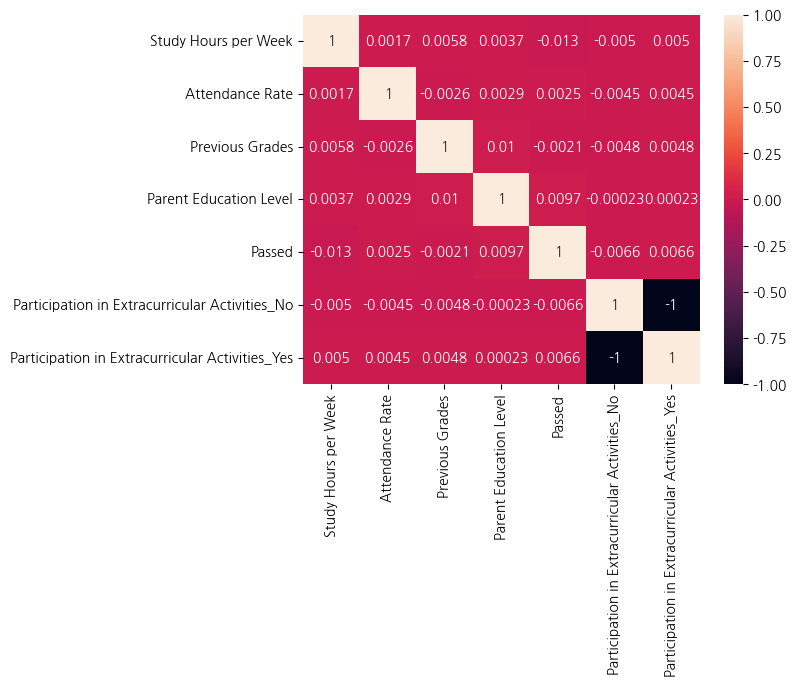

In [99]:
# 시본 시각화
sns.heatmap(cor_data,annot=True)

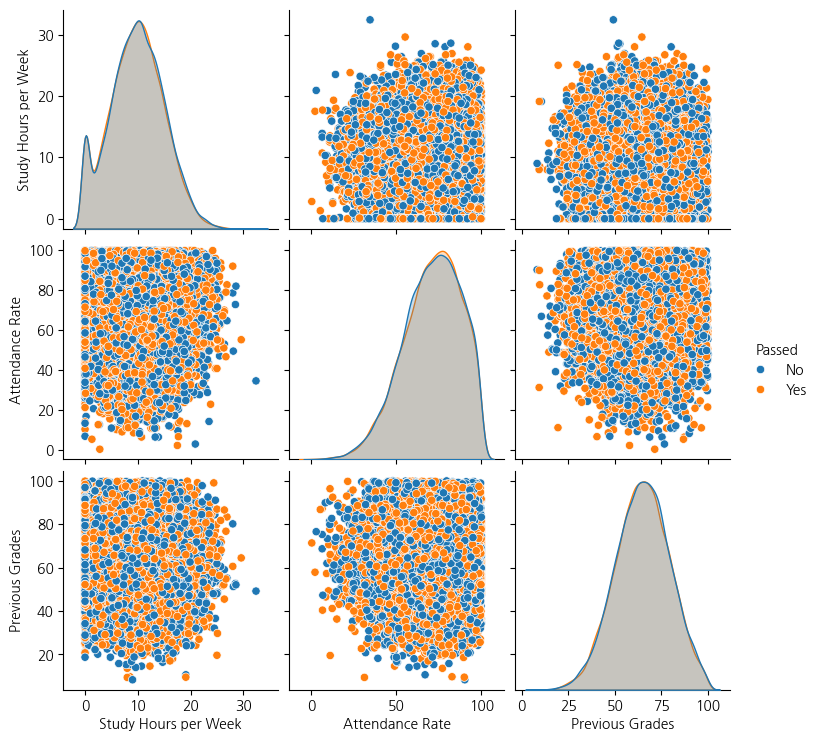

In [100]:
sns.pairplot(studentDF[['Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Passed']], hue='Passed', diag_kind='kde')
plt.show()

In [101]:
from sklearn.decomposition import PCA

In [102]:
# 주성분 추출

pca= PCA(n_components=3, svd_solver='auto')
pca.fit(feature)

PCA(n_components=3)

In [103]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([282.63487712, 272.89900327,  22.14616907]),
 array([0.48715061, 0.47036982, 0.03817123]))

In [104]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [105]:
pca_feature= pca.transform(feature)

In [106]:
pca_feature.shape

(25575, 3)

In [107]:
# 데이터 분리 및 스케일링

# 분리
lr_model=make_model(pca_feature)
X_train, X_test, Y_train, Y_test= train_test_split(feature, target, test_size=.25, random_state=777)

In [108]:
# 스케일링
mmscaler=MinMaxScaler()
mmscaler.fit(X_train)
X_test_scaled=mmscaler.transform(X_test)
X_train_scaled=mmscaler.transform(X_train)

In [138]:
# 학습
# - 하이퍼 파라미터 설정
H_params={'C': range(1,51,10),
          'max_iter': range(50,550,100),
          'solver': ['lbfgs', 'liblinear']}
reg_model=LogisticRegression()

gr_model_1= GridSearchCV(estimator=reg_model, param_grid=H_params, cv=5, refit=True, return_train_score=True, verbose=2)
                         
gr_model_1.fit(X_train_scaled, Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [22107, 19181]

In [111]:
best_est_1=gr_model_1.best_estimator_
print(best_est_1.score(X_train_scaled, Y_train))
best_est_1.score(X_test, Y_test)
pred= best_est_1.predict(X_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

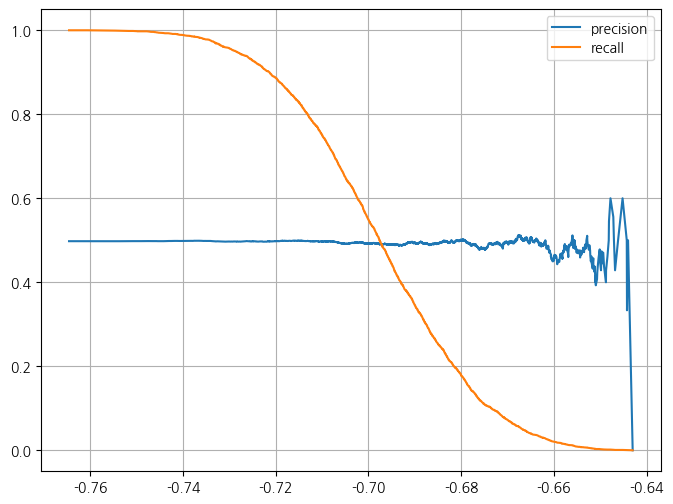

In [73]:
# precisions, recalls, thresholds= precision_recall_curve(Y_test, pp1)
# plt.figure(figsize=(8,6))
# threshold_boundary=thresholds.shape[0]
# plt.plot(thresholds, precisions[0:threshold_boundary], label='precision')
# plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
# plt.grid()
# plt.legend()
# plt.show()


In [112]:
# 둘다 라벨 인코더를 쓰면 어떨까??
studentDF_scaled2=studentDF.copy()
# label_encdoer-> 빈도수를 기준으로 하기 때문에 replace사용
studentDF_scaled2['Parent Education Level']= studentDF_scaled2['Parent Education Level'].replace({'Under_Middle': 0, 'High School':1,
                                                    'Associate':2, 'Bachelor':3, 'Master':4,
                                                    'Doctorate':5})

studentDF_scaled2['Participation in Extracurricular Activities']=studentDF_scaled2['Participation in Extracurricular Activities'].replace({'Yes':1,
                                                                                                                                           'No':0})



In [118]:
feature=studentDF_scaled2[['Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Parent Education Level',
                          'Participation in Extracurricular Activities']]
target=studentDF_scaled2['Passed'].replace({'Yes': 1, 'No':0})
# 주성분 분석
pca2=PCA(n_components=2, svd_solver='auto')
feature_pca= pca2.fit_transform(feature)
# 데이터 분리 및 스케일링
feature_pca.shape, target.shape
# 분리

X_train2, X_test2, Y_train2, Y_test2= train_test_split(feature_pca, target, test_size=.25, random_state=777)

# # 스케일링
mmscaler=MinMaxScaler()
mmscaler.fit(X_train2)
X_test_scaled=mmscaler.transform(X_test2)
X_train_scaled=mmscaler.transform(X_train2)


In [121]:
# 학습
# - 하이퍼 파라미터 설정
H_params={'C': range(1,50, 10),
          'max_iter': range(50,500,10),
          'solver': ['lbfgs', 'liblinear']}

# lr_model.model=LogisticRegression()

# lr_model.get_best_grid_model(model_name=LogisticRegression(), Hparams=H_params,
#                              cv=5, scoring='accuracy')
reg_model=LogisticRegression()

gr_model_1= GridSearchCV(estimator=reg_model, param_grid=H_params, cv=5, refit=True, return_train_score=True, verbose=2)
gr_model_1.fit(X_train_scaled, Y_train2)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END .....................C=1, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END .................C=1, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END .....................C=1, max_iter=60, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=6

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(1, 50, 10), 'max_iter': range(50, 500, 10),
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, verbose=2)

In [122]:
gr_model_1.best_score_

0.49744406834246035

-----------------------------------------

In [136]:
studentDF_scaled['Passed']=studentDF_scaled['Passed'].replace({'Yes': 1, 'No':0})

feature2=studentDF_scaled[['Study Hours per Week', 'Previous Grades']]
target2=studentDF_scaled['Passed']
pca3=PCA(n_components=2, svd_solver='auto')
feature2_pca=pca3.fit_transform(feature2)


H_params={'C': range(1,51,10),
          'max_iter': range(50,850,100),
          'solver': ['lbfgs', 'liblinear']}

In [137]:
XX_train, XX_test, YY_train, YY_test= train_test_split(feature2_pca, target2, test_size=.25, random_state=777)
lrlr_model=LogisticRegression()
gsgs_model=GridSearchCV(lrlr_model, param_grid=H_params, return_train_score=True, cv=5, verbose=2)
gsgs_model.fit(XX_train, YY_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END .....................C=1, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END .................C=1, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END ....................C=1, max_iter=150, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, max_iter=150,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(1, 51, 10), 'max_iter': range(50, 850, 100),
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, verbose=2)

In [134]:
bb=gsgs_model.best_estimator_
bb_pred= bb.predict(XX_test)
print(confusion_matrix(Y_test,bb_pred), gsgs_model.best_score_)
# print(bb.coef_, bb.intercept_, gsgs_model.best_score_, gsgs_model.best_params_)

print(classification_report(Y_test, bb_pred))

[[3024  174]
 [3017  179]] 0.504509600419384
              precision    recall  f1-score   support

           0       0.50      0.95      0.65      3198
           1       0.51      0.06      0.10      3196

    accuracy                           0.50      6394
   macro avg       0.50      0.50      0.38      6394
weighted avg       0.50      0.50      0.38      6394



In [177]:
# 스케일링 방식을 다르게

# 스케일링2
sdscaler=StandardScaler()
sdscaler.fit(X_train)
X_train_sdscaled=sdscaler.transform(X_train)
X_test_sdscaled=sdscaler.transform(X_test)

In [183]:
# 학습2
# - 하이퍼 파라미터 설정
H_params={'C': range(1,51,10),
          'max_iter': range(30,530,100),
          'solver': ['lbfgs', 'liblinear']}
reg_model=LogisticRegression()

gr_model_1= GridSearchCV(estimator=reg_model, param_grid=H_params, cv=5, refit=True, return_train_score=True, verbose=2)
                         
gr_model_1.fit(X_train_sdscaled, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .....................C=1, max_iter=30, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=30, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=30, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=30, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, max_iter=30, solver=lbfgs; total time=   0.0s
[CV] END .................C=1, max_iter=30, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=30, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=30, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=30, solver=liblinear; total time=   0.0s
[CV] END .................C=1, max_iter=30, solver=liblinear; total time=   0.0s
[CV] END ....................C=1, max_iter=130, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, max_iter=130,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(1, 51, 10), 'max_iter': range(30, 530, 100),
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, verbose=2)

In [91]:
# 모델 저장
import pickle
import joblib
joblib.dump(bb, './ML_model.pkl')
# with open('DL_model.pikle', mode='wb') as f:
#     pickle.dump(bb, f)


['./ML_model.pkl']

In [39]:
print(gr_model_1.best_score_, gr_model_1.best_params_)
asdf_model=gr_model_1.best_estimator_
# re_pred= asdf_model.predict(X_test_sdscaled)
# print(confusion_matrix(Y_test, re_pred))
# print(classification_report(Y_test,re_pred))

0.505677561074969 {'C': 31, 'max_iter': 50, 'solver': 'lbfgs'}


In [128]:
sample= X_test.iloc[1]
sample= [sample[[0,2]]]

In [130]:
test_model=joblib.load('ML_model.pkl')
a= test_model.predict(sample)
print(a)

[1]


c:\Users\KDP-25\anaconda3\envs\NLP\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [133]:
Y_test.value_counts()

Passed
0    3701
1    3669
Name: count, dtype: int64